# Assignment 5

CS4172 Machine Learning Lab

Name: Abhiroop Mukherjee

Enrolment Number: 510519109

## Task 1

Download and install TensorFlow from
https://www.tensorflow.org/install/install_sources or using command
`sudo pip install tensorflow` alternatively the Keras library can be used.

Download MNIST dataset (contains class labels for digits 0-9). using 
the command:

```python
import tensorflow as tf
data = tf.contrib.learn.datasets.mnist.load_mnist()
```
or 
```python
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

In [1]:
import tensorflow as tf
mnist_data = tf.keras.datasets.mnist.load_data()

In [2]:
mnist_data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

mnist_data is a Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist_data
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Task 3

Reduce the training size by 1/10 if computation resources are limited.

Define radial basis function (RBF) as

```python
def RBF(x, c, s):
    return np.exp(-np.sum((x-c)**2, axis=1)/(2*s**2))
```
where, x is the actual value, c is centre (assumed as mean) and s is the standard deviation.

Converted 28\*28 image into 32\*32 using rbf and store the new dataset with the labels. Split the dataset as 80% training and 10% validation
and 10% test.

In [4]:
import numpy as np

def RBF(x, c, s):
    return np.exp(-np.sum((x-c)**2, axis=1)/(2*s**2))

# TODO: used simple scaling to upscale the image, 
# use rbf to do this in future

In [5]:
from tensorflow.image import resize

# reshape to convert 28x28 image (assumed greyscale) 
# to 28x28x1 (1 denoting only one value per pixel 
# [rgb will have three numbers for eg]) 

x_train = np.reshape(x_train, (-1, 28,28,1))
x_train = np.array([resize(img, [32,32]) for img in x_train])
print(f"x_train shape: {x_train.shape}")

x_test = np.reshape(x_test, (-1, 28,28,1))
x_test = np.array([resize(img, [32,32]) for img in x_test])
print(f"x_test shape: {x_test.shape}")


2022-10-06 22:45:22.930623: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-06 22:45:22.957512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-06 22:45:22.958103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-06 22:45:22.958916: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

x_train shape: (60000, 32, 32, 1)
x_test shape: (10000, 32, 32, 1)


In [6]:
import pandas as pd
# convert y to categorical
y_train = pd.get_dummies(y_train).to_numpy()
y_test = pd.get_dummies(y_test).to_numpy()

In [7]:
input_shape = x_train[0].shape
num_classes = len(y_train[0])

## Task 4

Now run the fully connected network after flattening the data by changing the number the hyper-parameters use adam optimizer(learning rate = 0.001) and categorical cross-entropy loss

| Hidden Layers  | Activation Function  | Hidden Neurons  |
|----------------|----------------------|-----------------|
| 1              | Sigmoid  | \[16\]  |
| 2              | Sigmoid  | \[16,32\]  |
| 3              | Sigmoid  | \[16,32,64\]  |

In [13]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


def train_model(
        activation_function: 'str',
        hidden_neurons: 'list[int]'):

    model = Sequential()
    model.add(Input(shape=(input_shape)))
    model.add(Flatten())

    for unit in hidden_neurons:
        model.add(Dense(unit, activation=activation_function))

    model.add(Dense(num_classes))

    model.summary()

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(x=x_train,
                        y=y_train,
                        validation_split=0.1,
                        epochs=100,
                        callbacks=[
                            EarlyStopping(
                                monitor='val_accuracy',
                                patience=3
                            )
                        ])

    return model, history


def plot_history(
        history: "tf.keras.callbacks.History",
        activation_function: 'str',
        hidden_neurons: 'list[int]'):
    plt.plot(history.history['loss'])
    plt.xticks(
        ticks=range(0, len(history.history['loss'])),
        labels=range(1, len(history.history['loss']) + 1, 1))
    plt.ylabel('Training Loss')
    plt.xlabel('Epoch')
    plt.title(
        f'train_loss vs epoch for {activation_function} {hidden_neurons}')
    plt.show()

    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.xticks(
        ticks=range(0, len(history.history['loss'])),
        labels=range(1, len(history.history['loss']) + 1, 1))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title(f'Accuracy vs epoch for {activation_function} {hidden_neurons}')
    plt.legend()
    plt.show()


In [16]:
result = pd.DataFrame(
    columns=['Hidden Layers', 'Activation Function', 'Hidden Neurons', 'Test Acccuracy'],
    )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 16)                16400     
                                                                 
 dense_9 (Dense)             (None, 10)                170       
                                                                 
Total params: 16,570
Trainable params: 16,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 8s 5ms/step - loss: 8.7834 - accuracy: 0.1068 - val_loss: 11.2398 - val_accuracy: 0.1028
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 10.2241 - accuracy: 0.1011 - val_loss: 9.4647 - val_accuracy: 0.1025
Epoch 3/10
1688/1688 [==

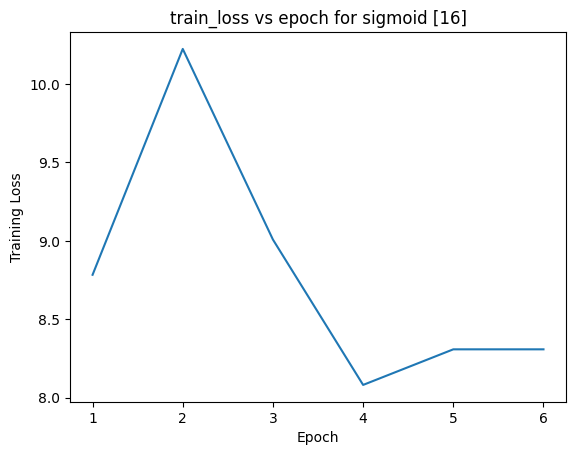

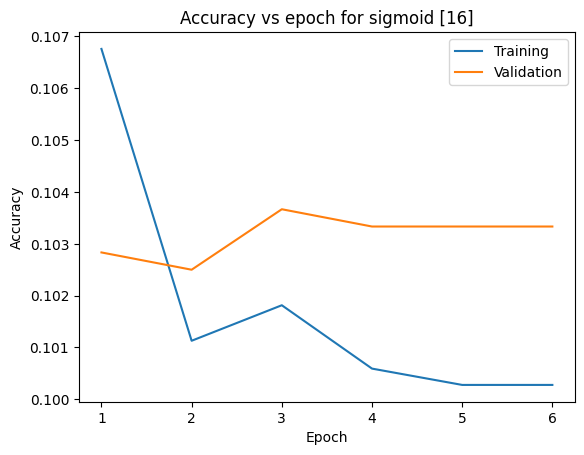

In [17]:
hidden_neurons = [16]
activation_function = 'sigmoid'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 16)                16400     
                                                                 
 dense_11 (Dense)            (None, 32)                544       
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 17,274
Trainable params: 17,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 8s 5ms/step - loss: 9.5751 - accuracy: 0.0990 - val_loss: 9.4559 - val_accuracy: 0.0952
Epoch 2/10
1688/1688 [================

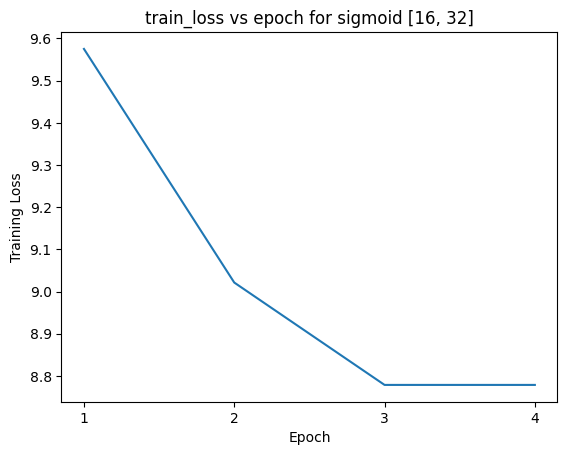

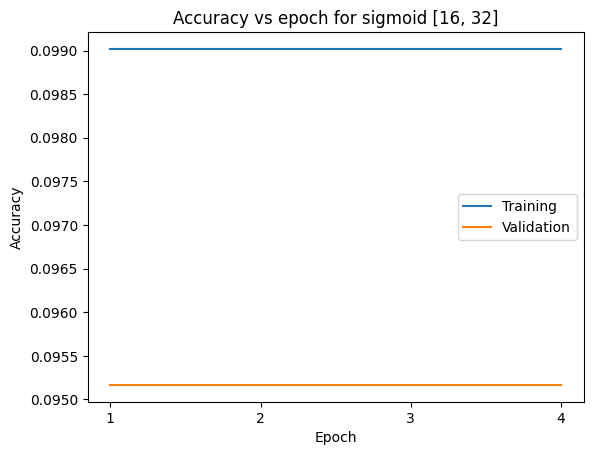

In [18]:
activation_function = 'sigmoid'
hidden_neurons = [16,32]

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_acc]

plot_history(history, activation_function, hidden_neurons)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 16)                16400     
                                                                 
 dense_14 (Dense)            (None, 32)                544       
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 19,706
Trainable params: 19,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1688/1688 [============================

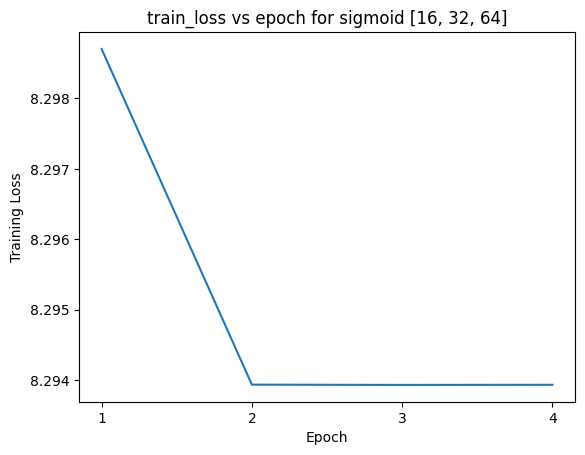

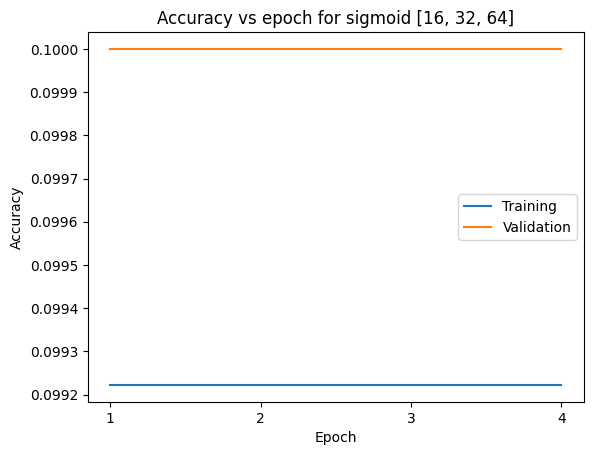

In [19]:
hidden_neurons = [16,32,64]
activation_function = 'sigmoid'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_acc]

plot_history(history, activation_function, hidden_neurons)

In [20]:
result

,Hidden Layers,Activation Function,Hidden Neurons,Test Acccuracy
0,1,sigmoid,[16],0.1003
1,2,sigmoid,"[16, 32]",0.0958
2,3,sigmoid,"[16, 32, 64]",0.1032
